In [1]:
import torch
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
val_sdss = np.load("datasets\sdss_val.npz", allow_pickle=True)
val_h2f = np.load("datasets\h2f_sdss_val.npz", allow_pickle=True)

z_val_sdss = torch.tensor(val_sdss["metadata"].item()["z"].values).float()
z_val_h2f = torch.tensor(val_h2f["metadata"].item()["z"].values).float()

In [3]:
def regression_metrics(y_true,y_pred):
    residuals = (y_pred- y_true)/(1+ y_true)

    bias = residuals.mean()
    nmad = 1.4826 * torch.median((residuals - torch.median(residuals)).abs())
    foutliers = (residuals.abs()>0.05).sum()/len(residuals)
    return bias, nmad, foutliers

In [4]:
bias_val_sdss = []
mad_val_sdss = []
outliers_val_sdss = []

bias_val_h2f = []
mad_val_h2f = []
outliers_val_h2f = []


for i in tqdm(range(30)):
    z_phot_sdss = torch.load(f"resultados\h2f_sdss_30_128batch\zphot_val_{i}.pt")
    z_phot_h2f = torch.load(f"resultados\sdss_128\zphot_val_{i}.pt")

    bias, nmad, foutliers = regression_metrics(z_val_sdss,z_phot_sdss)
    bias2, nmad2, foutliers2 = regression_metrics(z_val_h2f,z_phot_h2f)

    bias_val_sdss.append(bias)
    mad_val_sdss.append(nmad)
    outliers_val_sdss.append(foutliers)

    bias_val_h2f.append(bias2)
    mad_val_h2f.append(nmad2)
    outliers_val_h2f.append(foutliers2)

sdss_metrics ={
                "bias": bias_val_sdss,
                "mad": mad_val_sdss,
                "outliers": outliers_val_sdss
                    }
h2f_metrics ={
                "bias": bias_val_h2f,
                "mad": mad_val_h2f,
                "outliers": outliers_val_h2f
                    }

100%|██████████| 30/30 [00:00<00:00, 310.83it/s]


In [ ]:
    ax3.errorbar(intervalosz[1:] - 0.006, promedio_1, yerr=0, fmt="s", color="darkturquoise", markeredgecolor='black', markersize=6, label="SDSS", markeredgewidth=1)
    ax3.errorbar(intervalosz[1:] - 0.006, promedio_2, yerr=0, fmt="o", color='plum', markeredgecolor='black', markersize=6, 

In [9]:
def plot_comparisson(sdss, h2f):

    fig, axs = plt.subplots(1,3, figsize =(21,5))

    epoch =  np.arange(1,31)

    axs[0].scatter(epoch, sdss["bias"], label="SDSS", marker="s", edgecolor='black')
    axs[0].scatter(epoch, h2f["bias"], label="H2F", marker="o", edgecolor='black')
    axs[0].set_title("Val Bias evolution during training")
    axs[0].axhline(y=0, color='gray', linestyle='--')  # axhline instead of hline
    axs[0].set_xlabel("Epoch")
    axs[0].set_ylabel(f"$<\\Delta z> $")
    axs[0].set_ylim([-0.005,0.005])
    axs[0].legend()

    axs[1].plot(epoch, sdss["mad"], label="SDSS")
    axs[1].plot(epoch, h2f["mad"], label="H2F")
    axs[1].set_title("Val MAD evolution during training")
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel(f"$\\sigma_{{MAD}}$")
    axs[1].legend()

    axs[2].plot(epoch, sdss["outliers"], label="SDSS")
    axs[2].plot(epoch, h2f["outliers"], label="H2F")
    axs[2].set_title("Val Outliers evolution during training")
    axs[2].set_xlabel("Epoch")
    axs[2].set_ylabel(f"$\\eta$")
    axs[2].legend()

    plt.show()

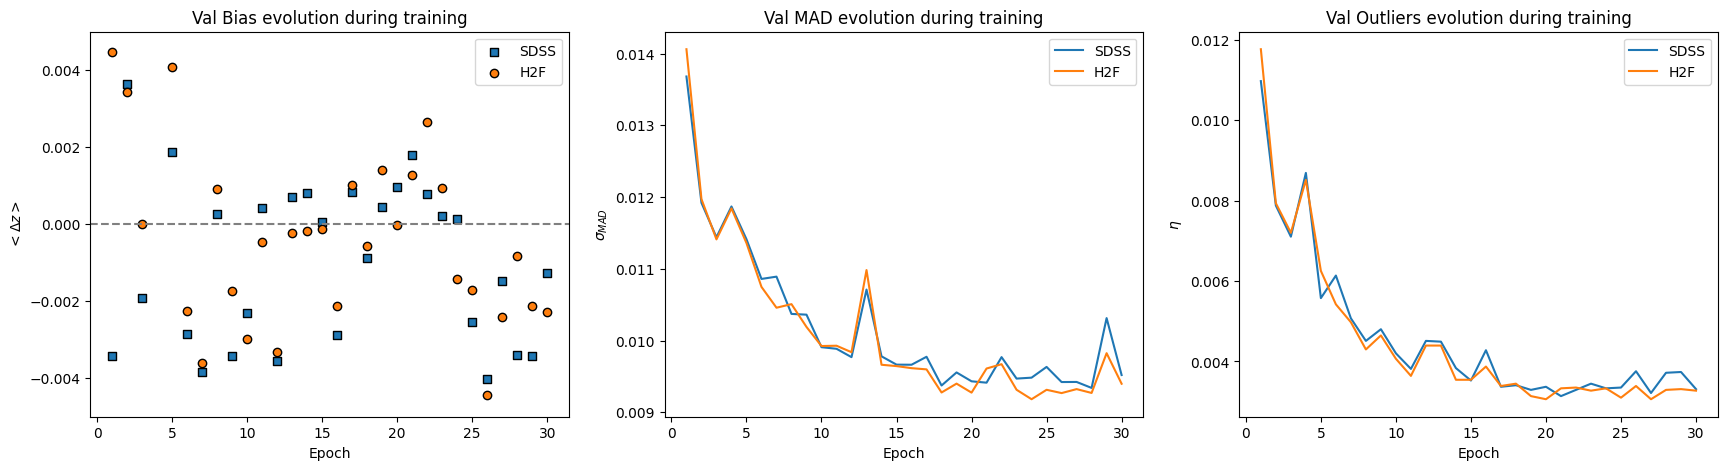

In [10]:
plot_comparisson(sdss_metrics, h2f_metrics)

In [6]:
curves_sdss = np.load("resultados\sdss_128\curvas.npy",allow_pickle=True).item()
curves_h2f = np.load("resultados\h2f_sdss_30_128batch\curvas.npy",allow_pickle=True).item()

In [7]:
def plot_loss(sdss,h2f):
    fig, axs = plt.subplots(1,2, figsize =(17,5))

    epoch =  np.arange(1,31)

    axs[0].plot(epoch, sdss["train_loss"], label="SDSS")
    axs[0].plot(epoch, h2f["train_loss"], label="H2F")
    axs[0].set_title("Evolution of loss during training")
    axs[0].set_xlabel("Epoch")
    axs[0].set_ylabel("Cross Entropy Loss")
    axs[0].legend()

    axs[1].plot(epoch, sdss["val_loss"], label="SDSS")
    axs[1].plot(epoch, h2f["val_loss"], label="H2F")
    axs[1].set_title("Evolution of Validation loss during training")
    axs[1].axvline(x=np.array(sdss["val_loss"]).argmin() + 1, color='red', linestyle='--', label=f"SDSS Loss: {np.array(sdss['val_loss']).min():.3f}")
    axs[1].axvline(x=np.array(h2f["val_loss"]).argmin()+1, color='purple', linestyle='--', label=f"H2F Loss: {np.array(h2f['val_loss']).min():.3f}") 
    axs[1].set_xlabel("Epoch")
    axs[1].set_ylabel("Cross Entropy Loss")
    axs[1].legend()

    plt.show()

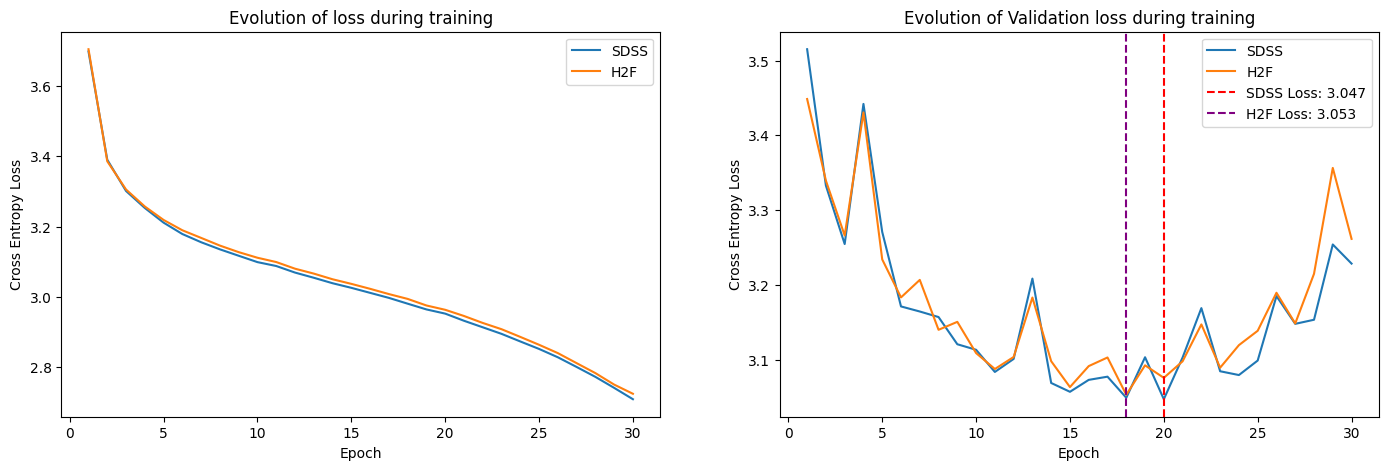

In [8]:
plot_loss(curves_sdss,curves_h2f)

In [9]:
z_phot_sdss = torch.tensor(np.load("resultados\sdss_128\zphot_test.npy"))
z_phot_h2f = torch.tensor(np.load("resultados\h2f_sdss_30_128batch\zphot_test.npy"))

In [ ]:
test_sdss = np.load("datasets\sdss_test.npz", allow_pickle=True)
test_h2f = np.load("datasets\h2f_sdss_test.npz", allow_pickle=True)

z_test_sdss = torch.tensor(test_sdss["metadata"].item()["z"].values).float()
z_test_h2f = torch.tensor(test_h2f["metadata"].item()["z"].values).float()

In [231]:
def metric_bin(zphot,zspec, metrica =""):
    res = ((zphot - zspec)/(1 + zspec))
    intervalosz = np.arange(0, 0.31, 0.012)
    metricaz = np.zeros(len(intervalosz) - 1)

    for i in range(len(metricaz)):
        intervalo_inferior = intervalosz[i]
        intervalo_superior = intervalosz[i + 1]

        datos_intervalo = res[(zspec >= intervalo_inferior) & (zspec < intervalo_superior)]
        if metrica == "bias":
            metricaz[i] = (datos_intervalo).mean()

        elif metrica == "mad":
            metricaz[i] = 1.4826 * torch.median((datos_intervalo - torch.median(datos_intervalo)).abs())
        
        elif metrica == "outliers":
            metricaz[i] = (datos_intervalo.abs()>0.05).sum()/len(datos_intervalo)

        else:
            raise ValueError("Ingrese una métrica válida ['bias', 'mad', 'outliers']")
            
    return metricaz

In [182]:
def plot_metrics_bins(z_spect, zphot1, zpho2, metric = "bias"):

    fig, axs = plt.subplots(1, 1, figsize=(7, 5), dpi=400)
    
    intervalosz = np.arange(0, 0.31, 0.012)

    counts, _, _ = axs.hist(z_spect, bins="auto", color="gray", histtype="stepfilled", alpha=0.5, edgecolor="gray")

    promedio_1 = metric_bin(zphot1,z_spect, metrica =metric)
    promedio_2 = metric_bin(zpho2,z_spect, metrica =metric)

    ax3 = axs.twinx()

    ax3.errorbar(intervalosz[1:] - 0.006, promedio_1, yerr=0, fmt="s", color="darkturquoise", markeredgecolor='black', markersize=6, label="SDSS", markeredgewidth=1)
    ax3.errorbar(intervalosz[1:] - 0.006, promedio_2, yerr=0, fmt="o", color='plum', markeredgecolor='black', markersize=6, label="H2F", markeredgewidth=1) #color="salmon"


    if metric == "bias":
        ax3.yaxis.tick_left()
        ax3.yaxis.set_label_position('left')
        ax3.yaxis.set_ticks_position('left')
        ax3.set_ylabel("$<\\Delta z>$", ha='right', fontsize=14, math_fontfamily='cm')

        axs.yaxis.tick_right()
        axs.yaxis.set_label_position('right')
        axs.yaxis.set_ticks_position('right')
        axs.text(0.31,2300 ,"N", fontsize=10, ha='left', va='bottom')

        axs.set_xlabel("$z$", fontsize=14, math_fontfamily='cm')
        axs.set_ylim([0, 5000])  

        ticks = np.linspace(0, 2000, 5)
        axs.set_yticks(ticks)

        ax3.set_ylim([-0.03, 0.03])
        ax3.set_yticks(np.linspace(-0.02, 0.02, 5))

        ax3.set_xlim([0, 0.3])
        ax3.legend()

        ax3.axhline(y=0, color='gray', linestyle='dotted')

        plt.tight_layout()
        plt.show()
    
    elif metric == "mad":
    
        ax3.yaxis.tick_left()
        ax3.yaxis.set_label_position('left')
        ax3.yaxis.set_ticks_position('left')
        ax3.set_ylabel("$\\sigma_{{MAD}}$", ha='right', fontsize=14, math_fontfamily='cm')

        axs.yaxis.tick_right()
        axs.yaxis.set_label_position('right')
        axs.yaxis.set_ticks_position('right')
        axs.text(0.31,2150 ,"N", fontsize=10, ha='left', va='bottom')

        axs.set_xlabel("$z$", fontsize=14, math_fontfamily='cm')
        axs.set_ylim([0, 3000])  

        ticks = np.linspace(0, 2000, 5)
        axs.set_yticks(ticks)

        ax3.set_ylim([0, 0.05])

        ax3.set_xlim([0, 0.3])
        ax3.legend()

        plt.tight_layout()
        plt.show()

    elif metric == "outliers":
    
        ax3.yaxis.tick_left()
        ax3.yaxis.set_label_position('left')
        ax3.yaxis.set_ticks_position('left')
        ax3.set_ylabel("$\\eta$", ha='right', fontsize=14, math_fontfamily='cm')

        axs.yaxis.tick_right()
        axs.yaxis.set_label_position('right')
        axs.yaxis.set_ticks_position('right')
        axs.text(0.31,2150 ,"N", fontsize=10, ha='left', va='bottom')

        axs.set_xlabel("$z$", fontsize=14, math_fontfamily='cm')
        axs.set_ylim([0, 3000])  

        ticks = np.linspace(0, 2000, 5)
        axs.set_yticks(ticks)

        ax3.set_ylim([0, 0.05])

        ax3.set_xlim([0, 0.3])
        ax3.legend()

        plt.tight_layout()
        plt.show()

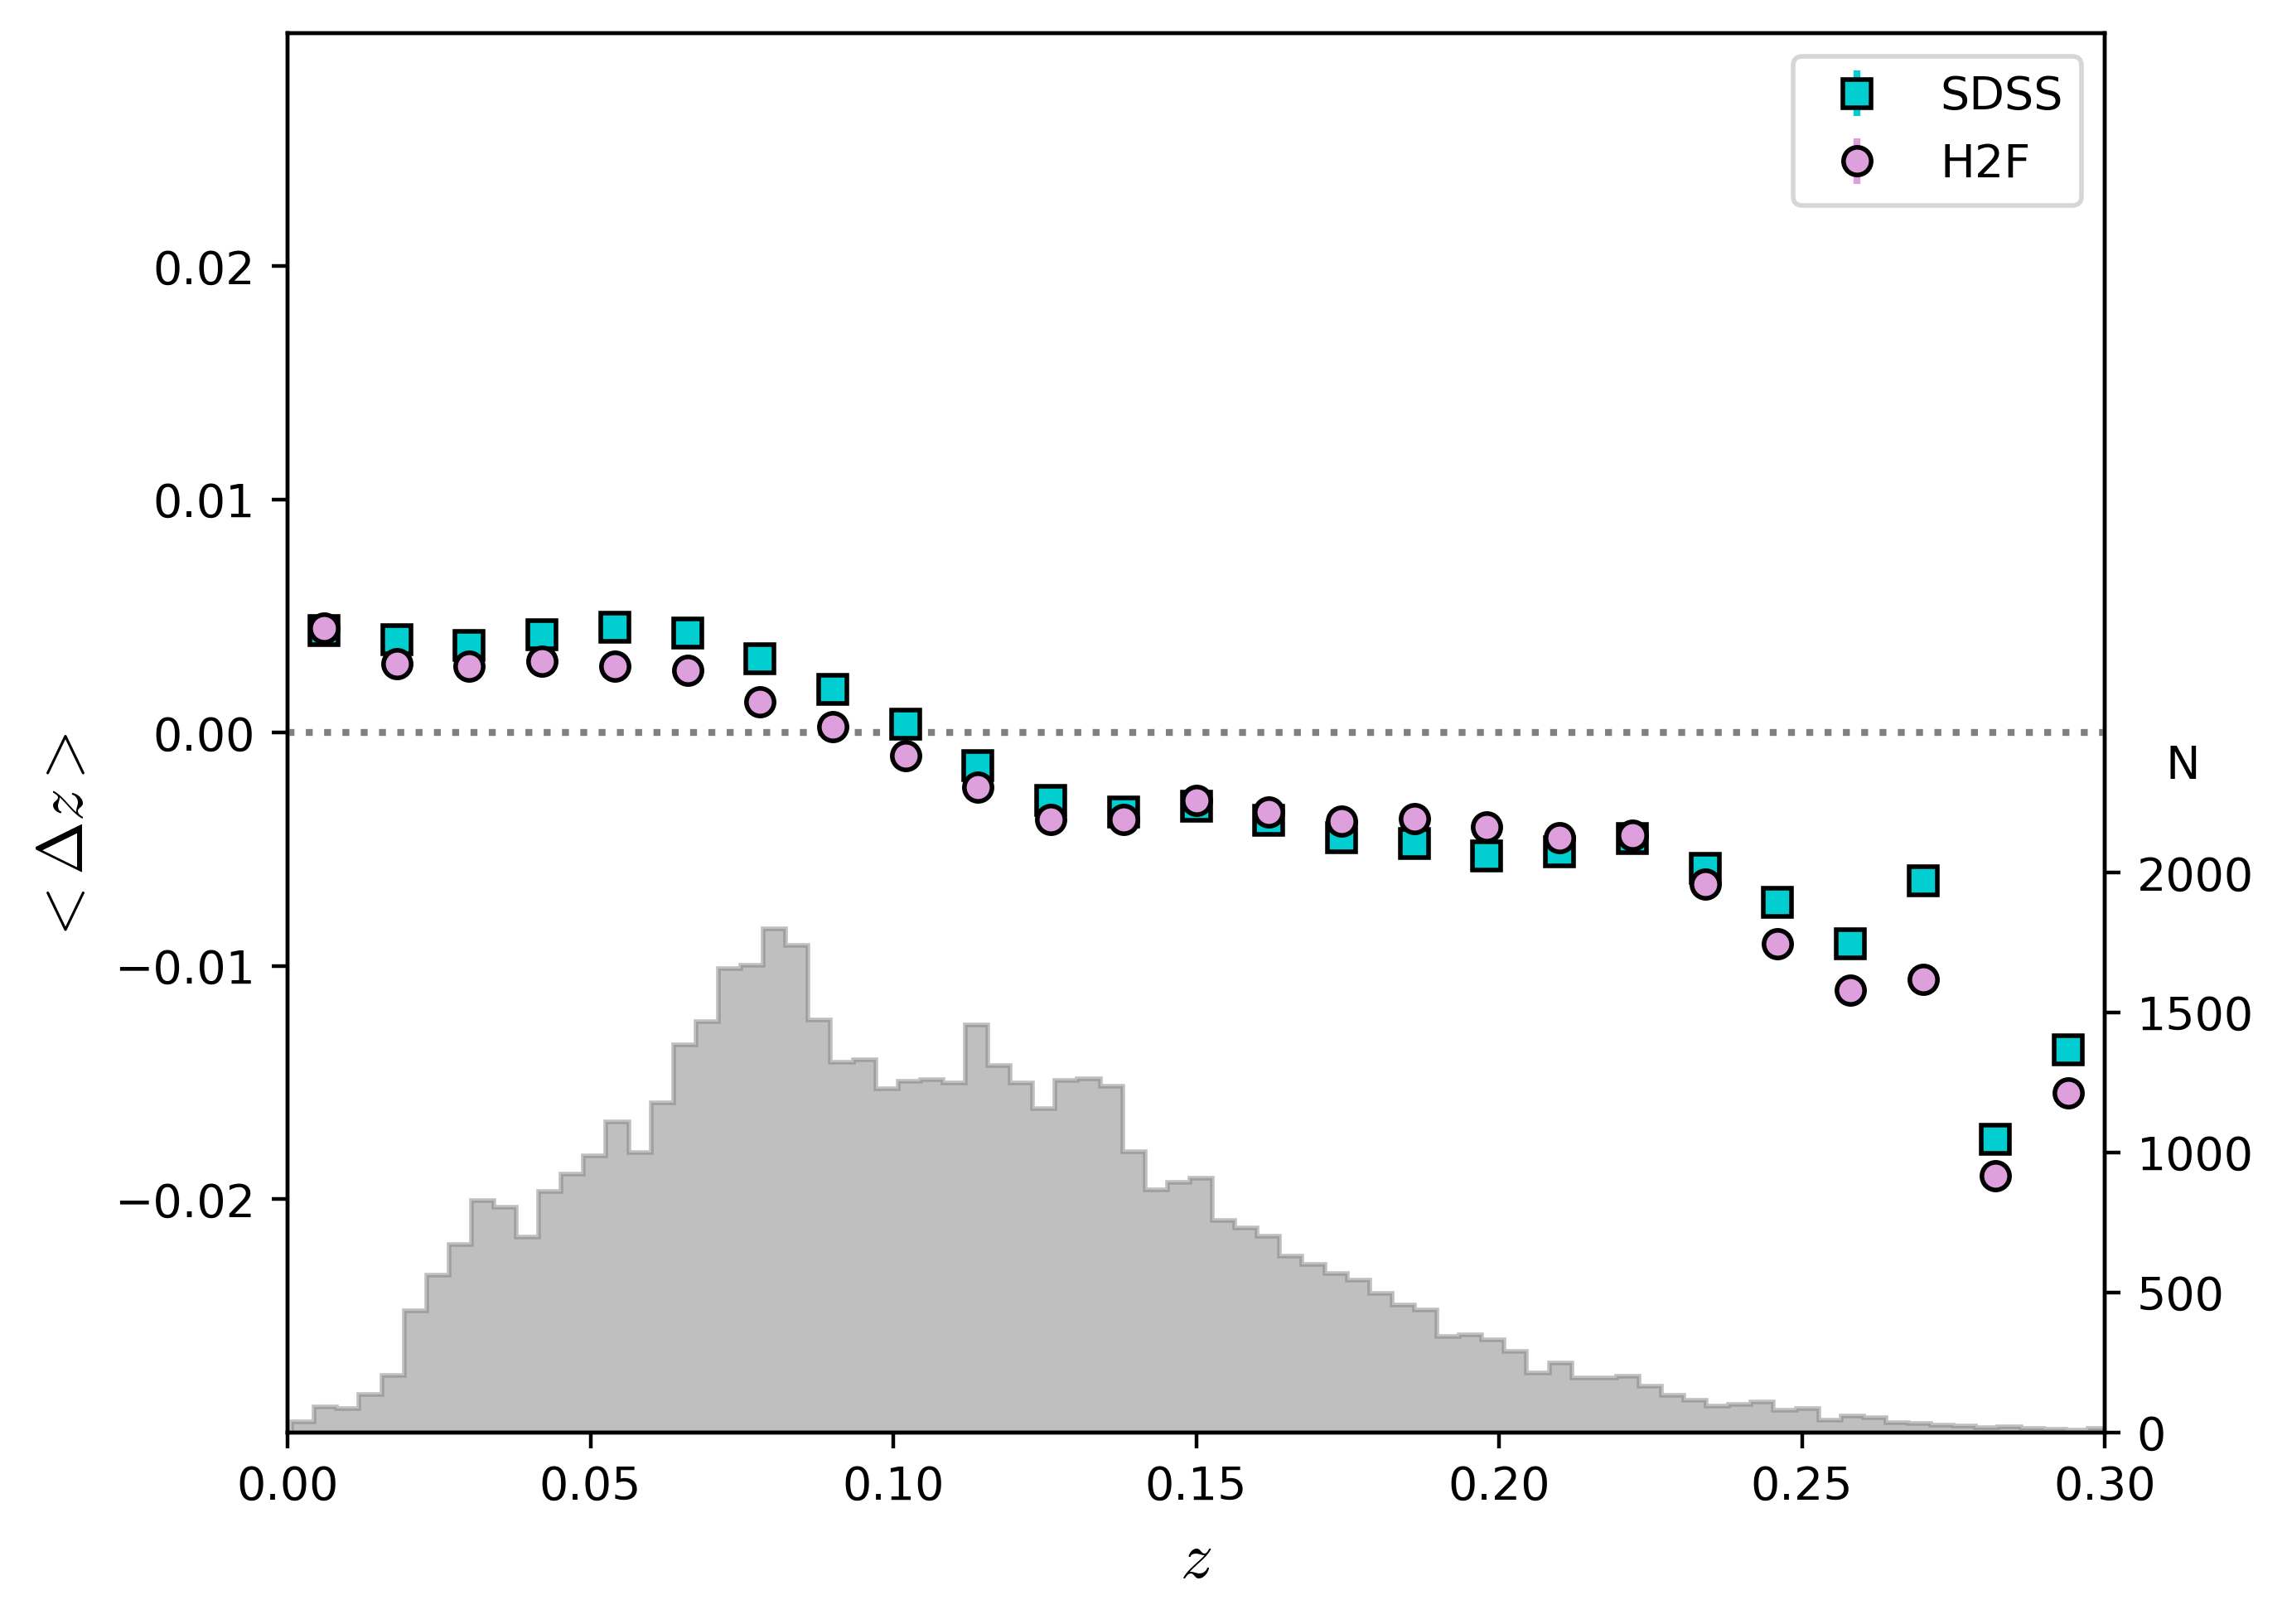

In [183]:
plot_metrics_bins(z_test_sdss, z_phot_sdss, z_phot_h2f, metric = "bias")

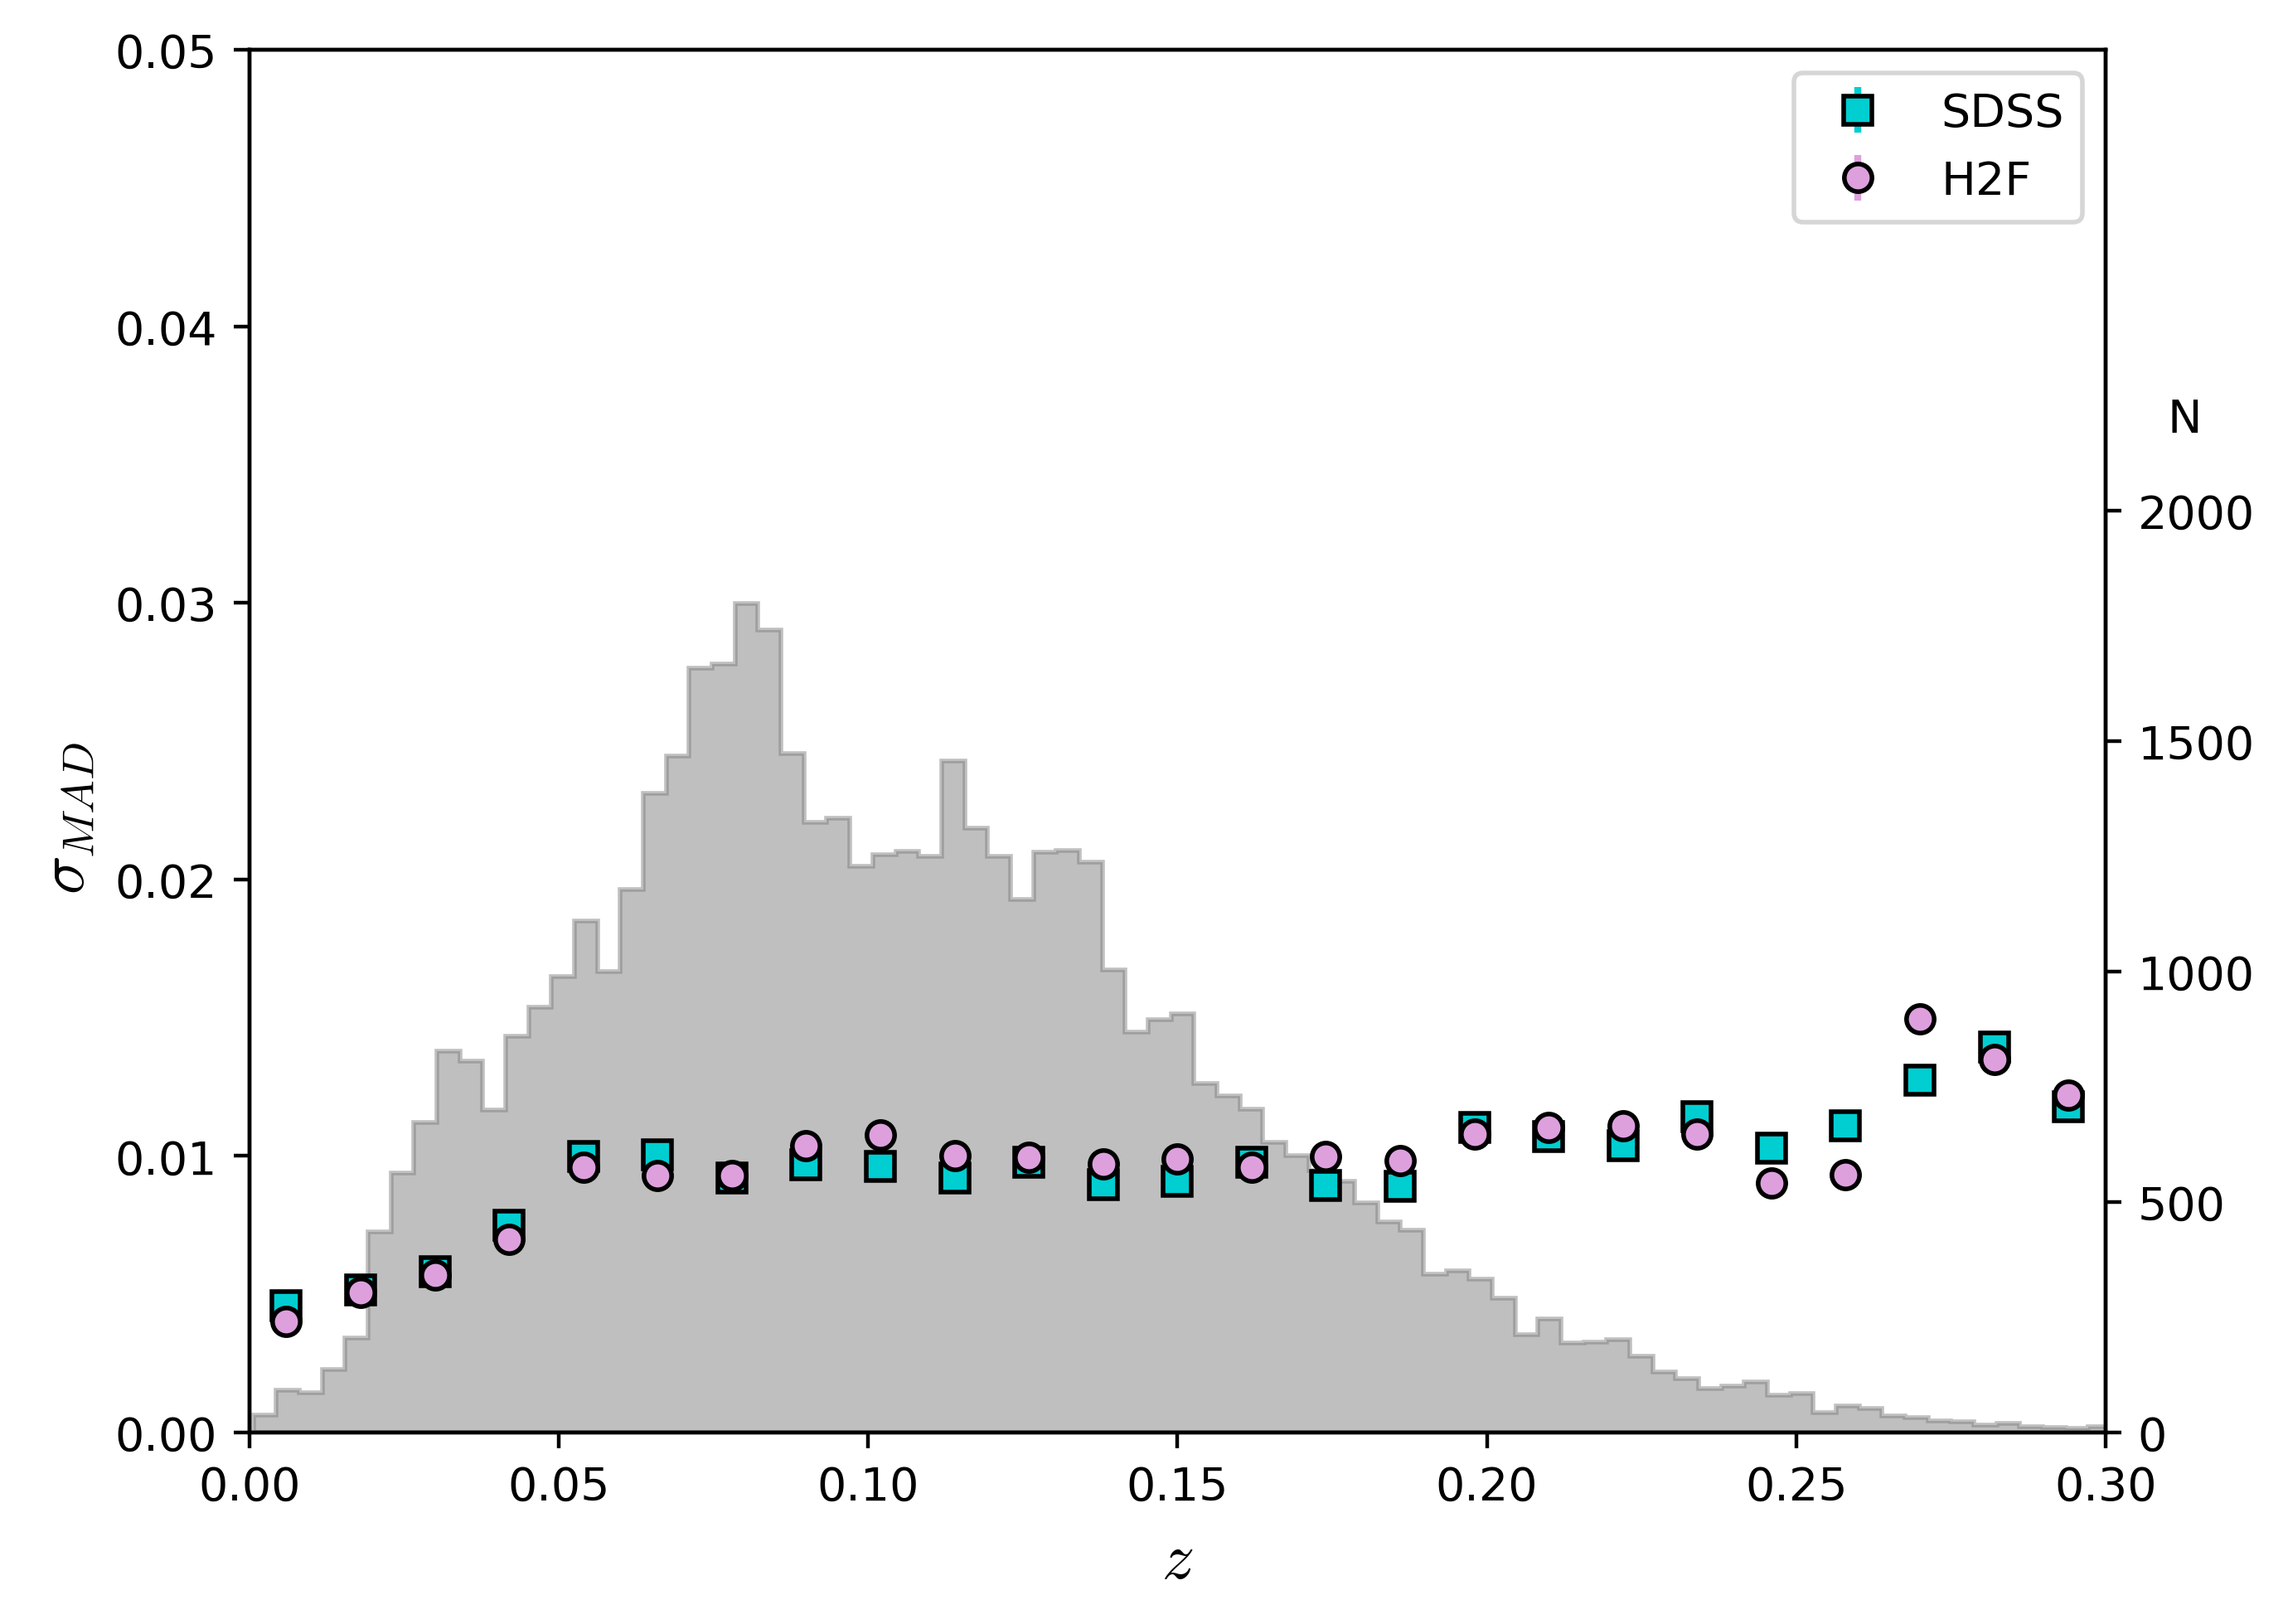

In [184]:
plot_metrics_bins(z_test_sdss, z_phot_sdss, z_phot_h2f, metric = "mad")

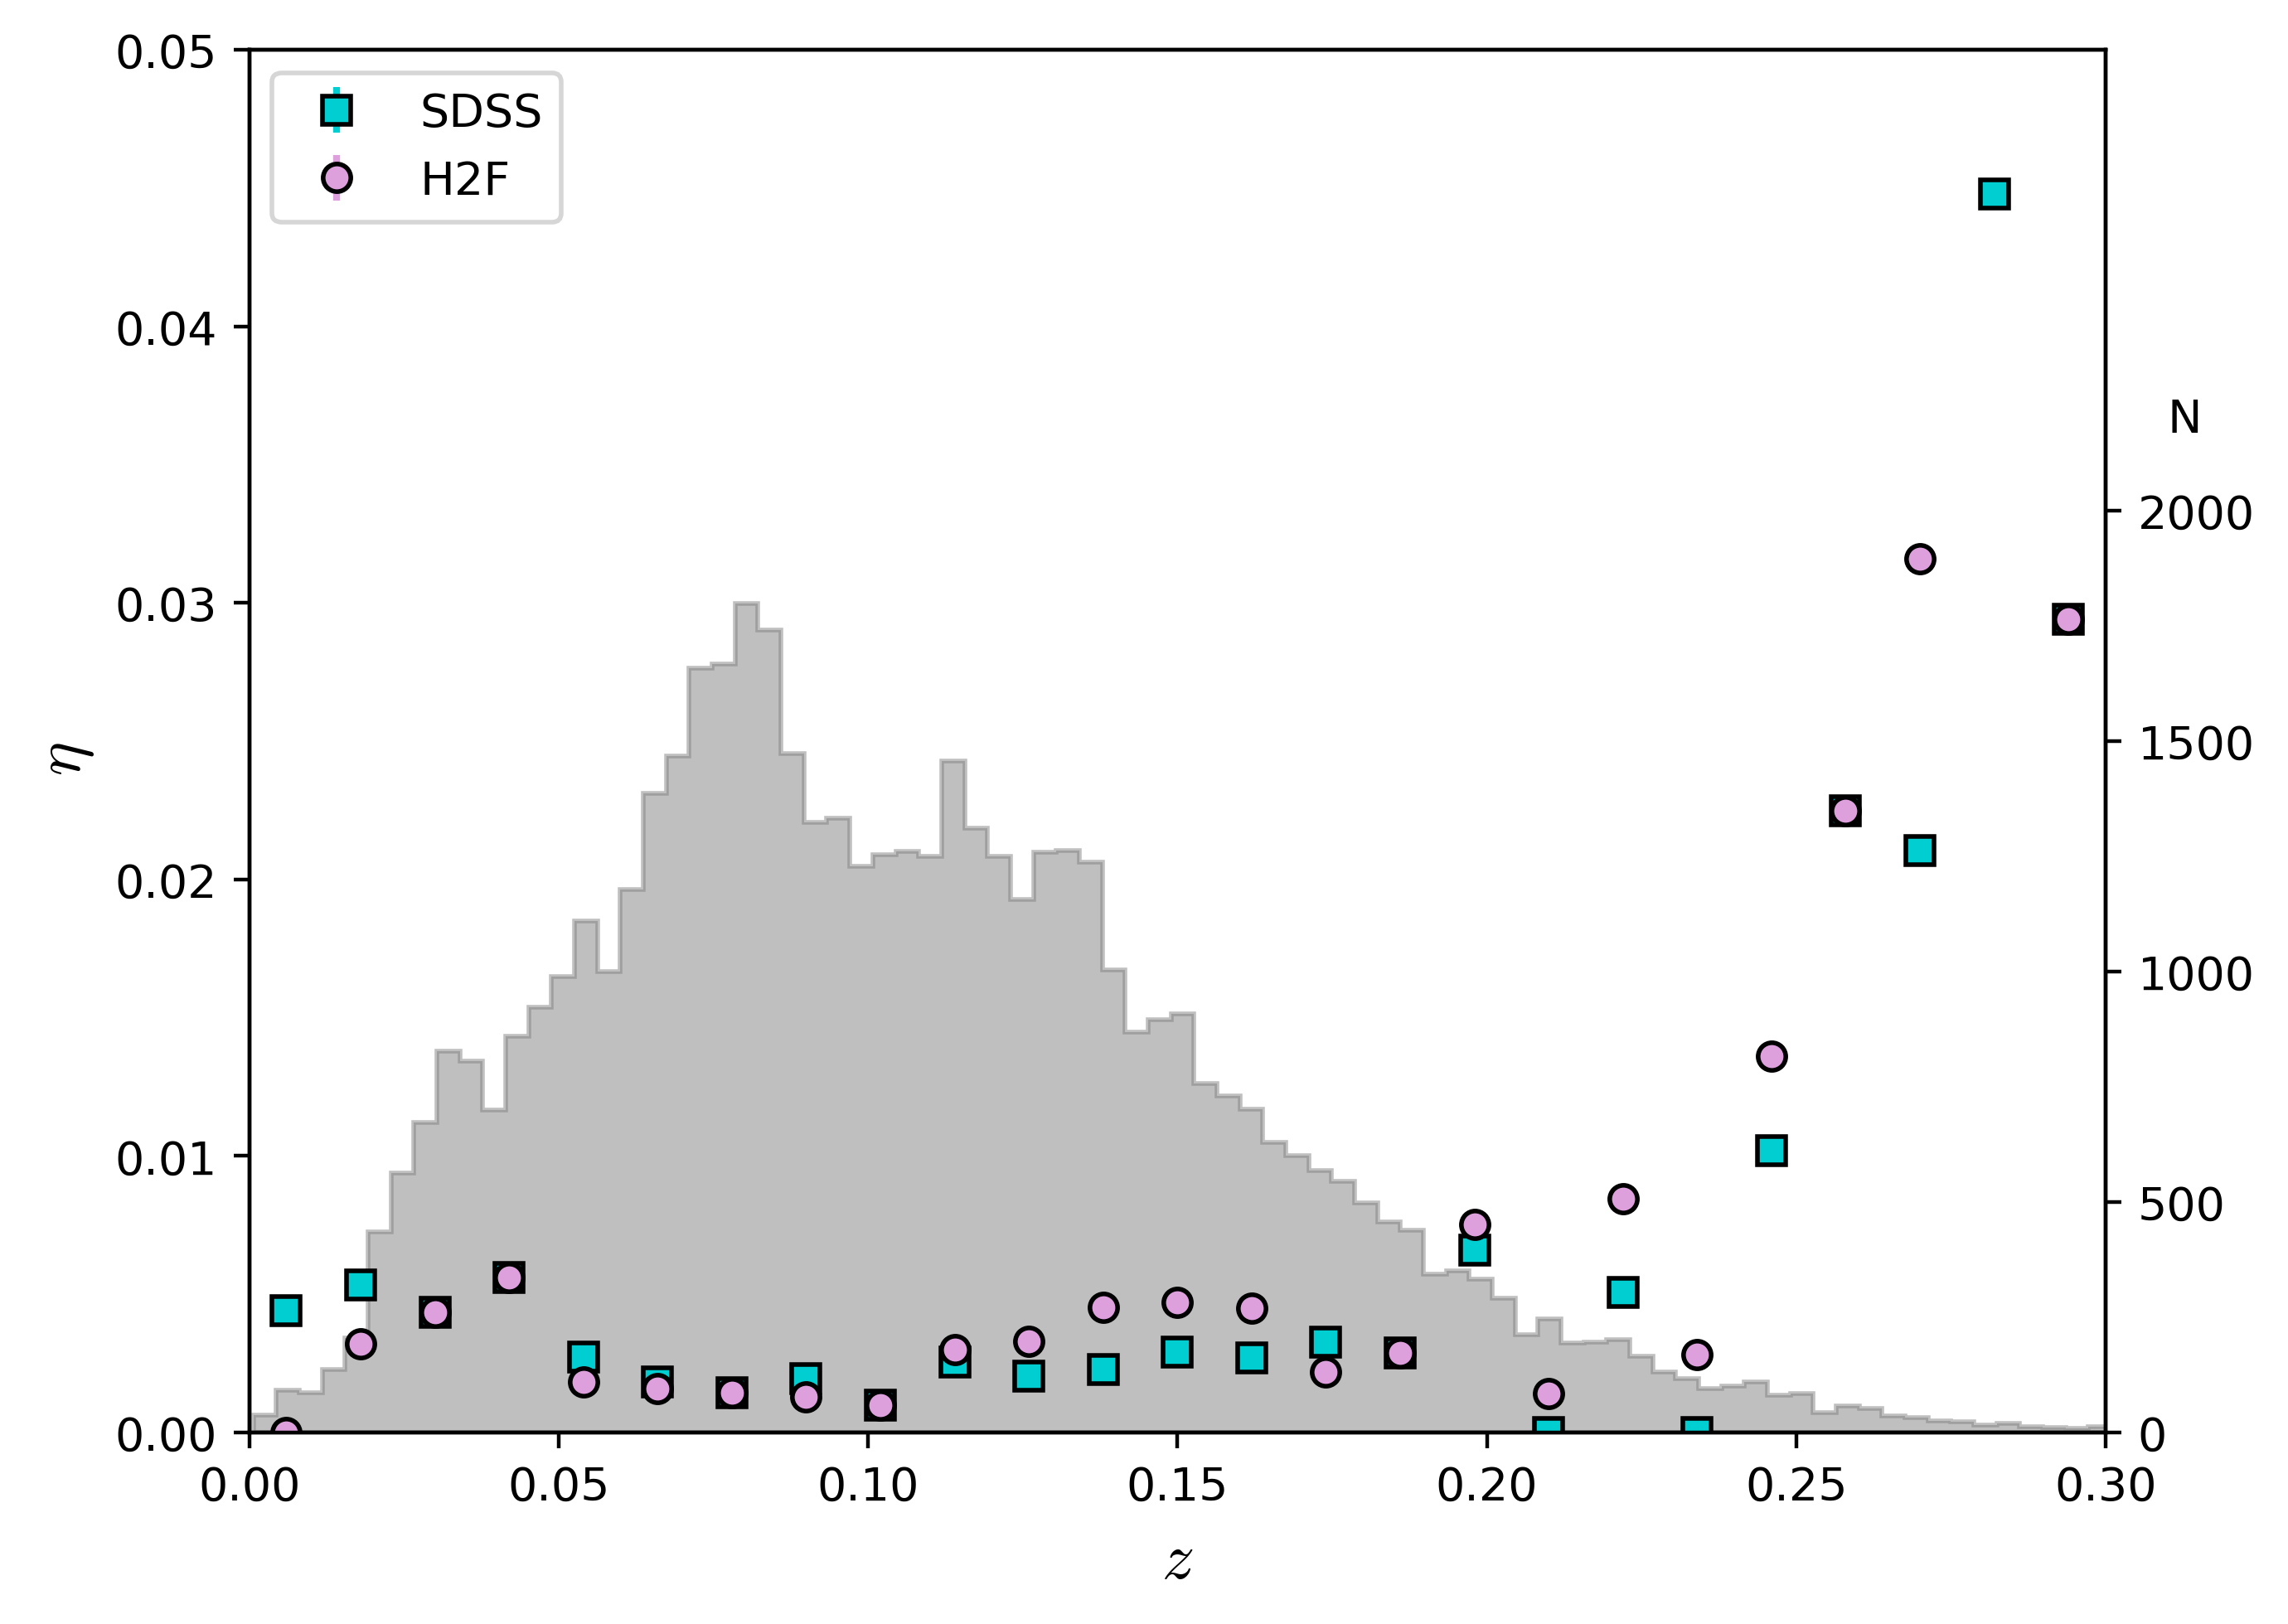

In [185]:
plot_metrics_bins(z_test_sdss, z_phot_sdss, z_phot_h2f, metric = "outliers")

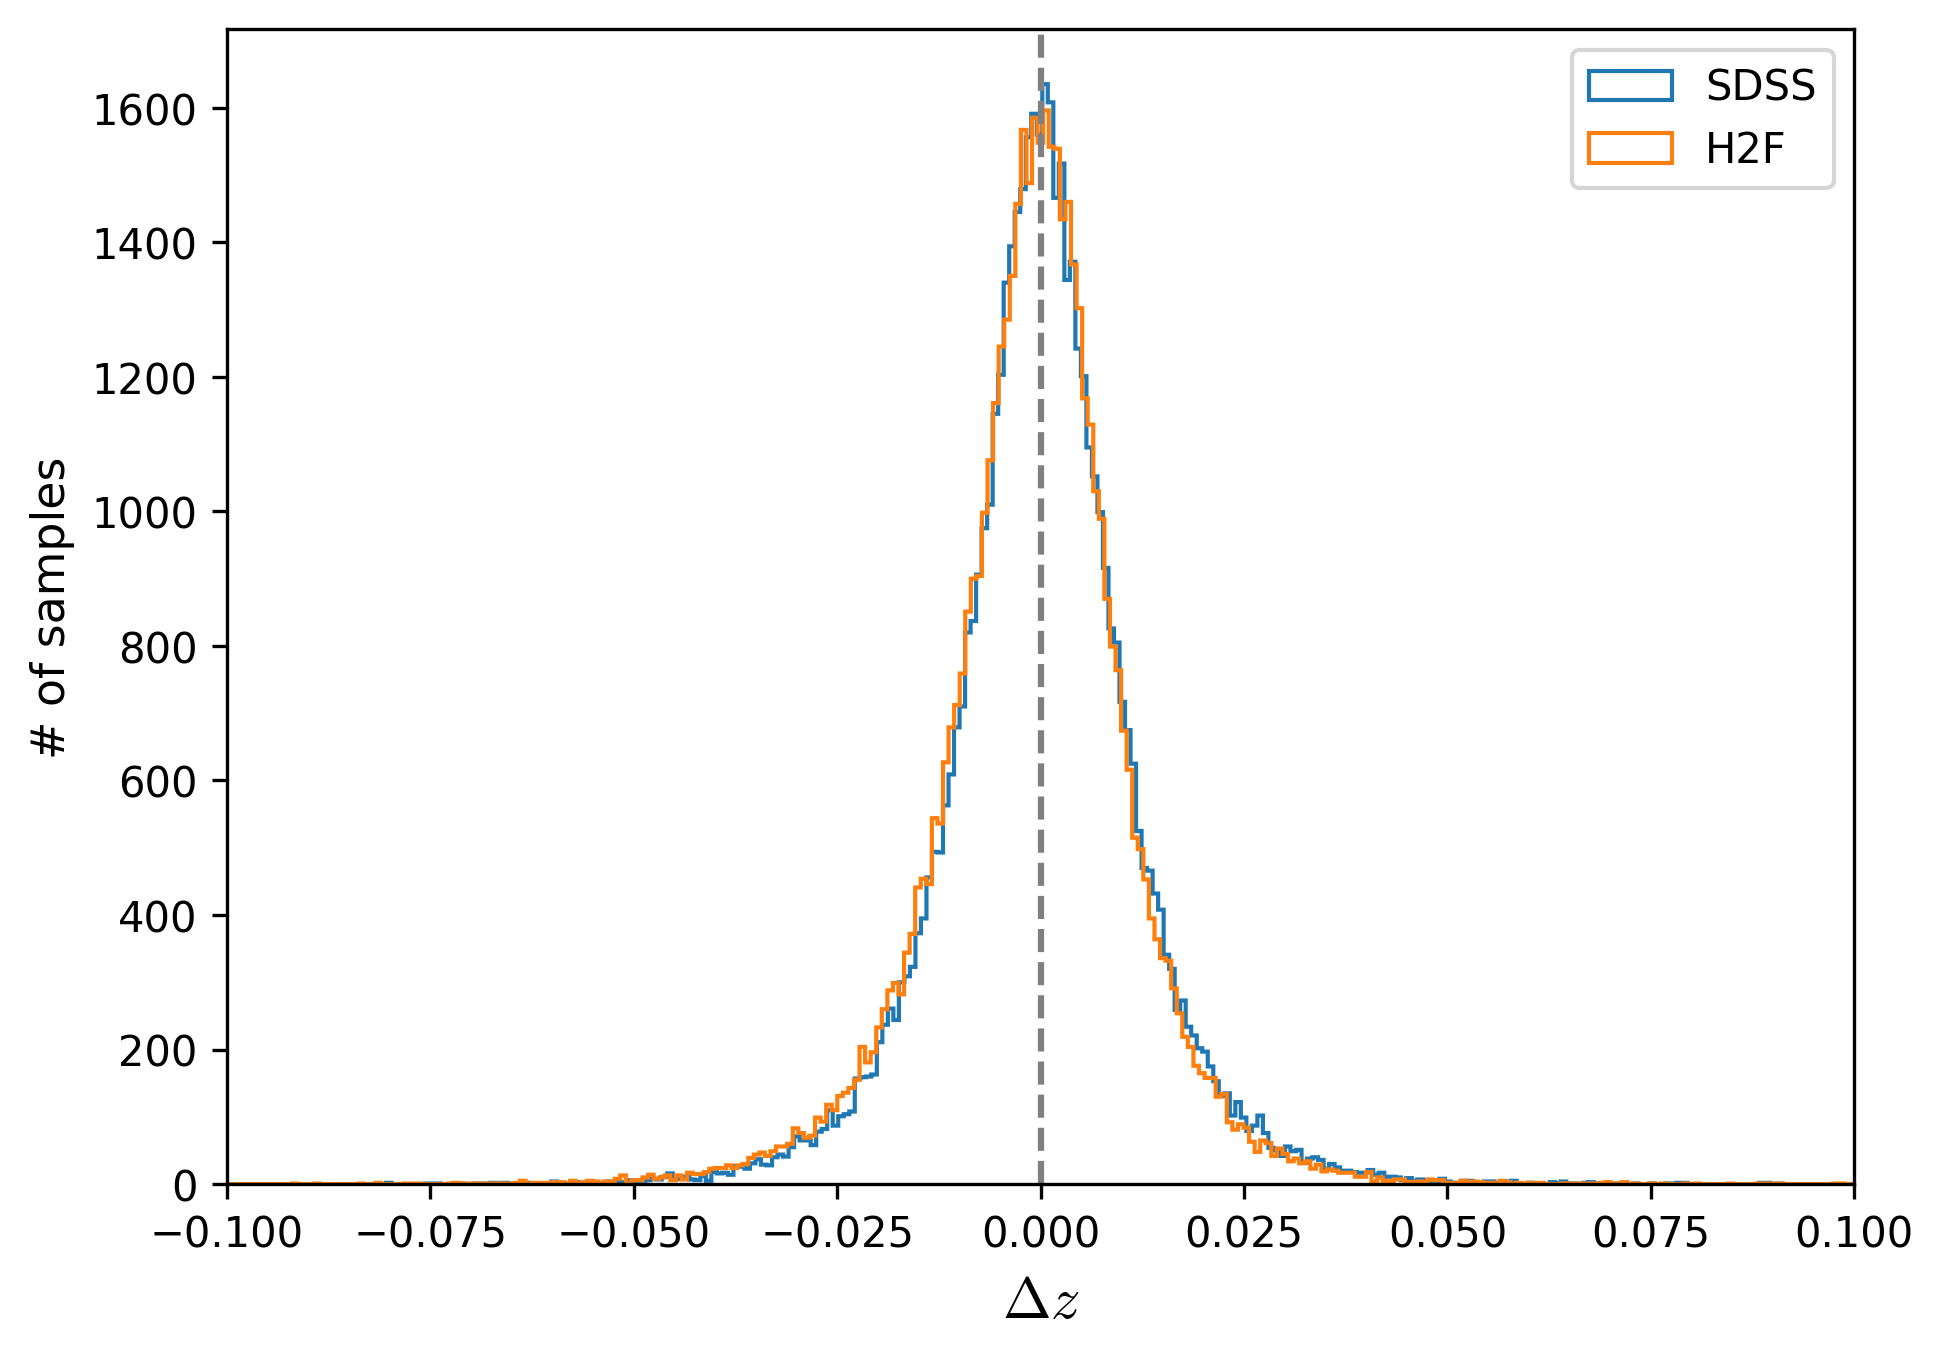

In [179]:
res_sdss = ((z_phot_sdss - z_test_sdss)/(1 + z_test_sdss))
res_h2f = ((z_phot_h2f - z_test_sdss)/(1 + z_test_sdss))

fig, axs = plt.subplots(1,1, figsize=(7,5), dpi=300)
axs.hist(res_sdss, bins="auto",histtype = "step", label="SDSS")
axs.hist(res_h2f, bins="auto",histtype = "step", label ="H2F")

axs.set_xlim([-0.1,0.1])
axs.axvline(x=0, color='gray', linestyle='--')
axs.set_ylabel("# of samples", fontsize=11)
axs.set_xlabel("$\\Delta z$", fontsize=14, math_fontfamily='cm')
axs.legend()
plt.show()

In [180]:
from scipy.stats import gaussian_kde

def plot_regression(z_spec, zphot1, zphot2, **kwargs):
    fig, (ax, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 5), **kwargs)

    ax_x_top = ax.twiny()
    ax_y_right = ax.twinx()

    ax_x_top2 = ax2.twiny()
    ax_y_right2 = ax2.twinx()

    ax.plot([0, 0.32], [0, 0.32], color='gray', linestyle='--')
    ax2.plot([0, 0.32], [0, 0.32], color='gray', linestyle='--')

    #################--------------------------------#################

    # Primer conjunto de datos
    xy1 = np.stack([z_spec.numpy(), zphot1.numpy()])
    z1 = gaussian_kde(xy1)(xy1)
    idx1 = z1.argsort()
    x1, y1, z1 = z_spec[idx1], zphot1[idx1], z1[idx1]

    sc1 = ax.scatter(x1, y1, c=z1, s=1, cmap="plasma") #ORIGINALMENTE S=2

    # Segundo conjunto de datos
    xy2 = np.stack([z_spec.numpy(), zphot2.numpy()])
    z2 = gaussian_kde(xy2)(xy2)
    idx2 = z2.argsort()
    x2, y2, z2 = z_spec[idx2], zphot2[idx2], z2[idx2]

    sc2 = ax2.scatter(x2, y2, c=z2, s=1, cmap="plasma") #ORIGINALMENTE S=2

    # Calcular los valores mínimos y máximos para la normalización de colores
    vmin = min(z1.min(), z2.min())
    vmax = max(z1.max(), z2.max())

    # Normalizar los colores en ambas gráficas usando los mismos valores vmin y vmax
    sc1.set_clim(vmin=vmin, vmax=vmax)
    sc2.set_clim(vmin=vmin, vmax=vmax)
    
    # Creamos una única barra de color para ambos gráficos usando los valores vmin y vmax calculados
    cbar = fig.colorbar(sc1, ax=[ax, ax2])
    cbar.set_label('Galaxy Density')

    #cbar.set_clim(vmin=vmin, vmax=vmax)
    cbar.ax.set_position([ax2.get_position().x1 + 0.17, ax2.get_position().y0, 0.03, ax2.get_position().height])

    #################--------------------------------#################


    font_size = 10

    ax.set_ylabel("ZPHOT",fontsize=9.5) 
    ax.set_xlabel("ZSPEC",fontsize=9.5) 

    ax2.set_xlabel("ZSPEC",fontsize=9.5)

    ax.set_xlim([0, 0.32])
    ax.set_ylim([0, 0.32])

    ax2.set_xlim([0, 0.32])
    ax2.set_ylim([0, 0.32])

    ax_x_top.set_xlim([0, 0.32])
    ax_y_right.set_ylim([0, 0.32])

    ax_x_top2.set_xlim([0, 0.32])
    ax_y_right2.set_ylim([0, 0.32])

    ax_x_top.get_xaxis().set_ticklabels([])
    ax_y_right.get_yaxis().set_ticklabels([])

    ax_x_top2.get_xaxis().set_ticklabels([])
    ax_y_right2.get_yaxis().set_ticklabels([])

    division_length = 5 
    ax.tick_params(axis='both', direction='in', length=division_length, labelsize=font_size, size=4)
    ax2.tick_params(axis='both', direction='in', length=division_length, labelsize=font_size, size=4)

    ax_x_top.tick_params(direction='in', length=division_length, size=4)
    ax_y_right.tick_params(axis='both', direction='in', length=division_length, size=4)

    ax_x_top2.tick_params(direction='in', length=division_length, size=4)
    ax_y_right2.tick_params(axis='both', direction='in', length=division_length, size=4)

    xticklabels = [0.05,0.10,0.15,0.20,0.25,0.30]
    ax.set_xticks(xticklabels)
    ax.set_xticklabels([f"{xtick:.2f}" for xtick in xticklabels])

    ax2.set_xticks(xticklabels)
    ax2.set_xticklabels([f"{xtick:.2f}" for xtick in xticklabels])

    bias1, nmad1, foutliers1 = regression_metrics(z_spec,zphot1)
    bias2, nmad2, foutliers2 = regression_metrics(z_spec,zphot2)

    ax.text(0.03, 0.295, f"SDSS", fontsize=font_size+1, color='black')
    ax.text(0.03, 0.27, f"$<\\Delta z> =$", fontsize=font_size, color='black', fontweight='bold', math_fontfamily='cm')
    ax.text(0.03, 0.252, f"$\\sigma_{{MAD}} =$", fontsize=font_size, color='black', fontweight='bold', math_fontfamily='cm')
    ax.text(0.03, 0.234, f"$\\eta =$", fontsize=font_size, color='black', fontweight='bold', math_fontfamily='cm')

    ax.text(0.088, 0.27, f"{-bias1:.5f}", fontsize=font_size, color='black')
    ax.text(0.073, 0.252, f"{nmad1:.5f}", fontsize=font_size, color='black')
    ax.text(0.049, 0.234, f"{foutliers1*100:.2f}%", fontsize=font_size, color='black')

    ax2.text(0.03, 0.295, f"H2F", fontsize=font_size+1, color='black')
    ax2.text(0.03, 0.27, f"$<\\Delta z> =$", fontsize=font_size, color='black', fontweight='bold', math_fontfamily='cm')
    ax2.text(0.03, 0.252, f"$\\sigma_{{MAD}} =$", fontsize=font_size, color='black', fontweight='bold', math_fontfamily='cm')
    ax2.text(0.03, 0.234, f"$\\eta =$", fontsize=font_size, color='black', fontweight='bold', math_fontfamily='cm')

    ax2.text(0.088, 0.27, f"{-bias2:.5f}", fontsize=font_size, color='black')
    ax2.text(0.073, 0.252, f"{nmad2:.5f}", fontsize=font_size, color='black')
    ax2.text(0.049, 0.234, f"{foutliers2*100:.2f}%", fontsize=font_size, color='black')

    fig.subplots_adjust(wspace=0)
    #plt.tight_layout()

    
    plt.show()

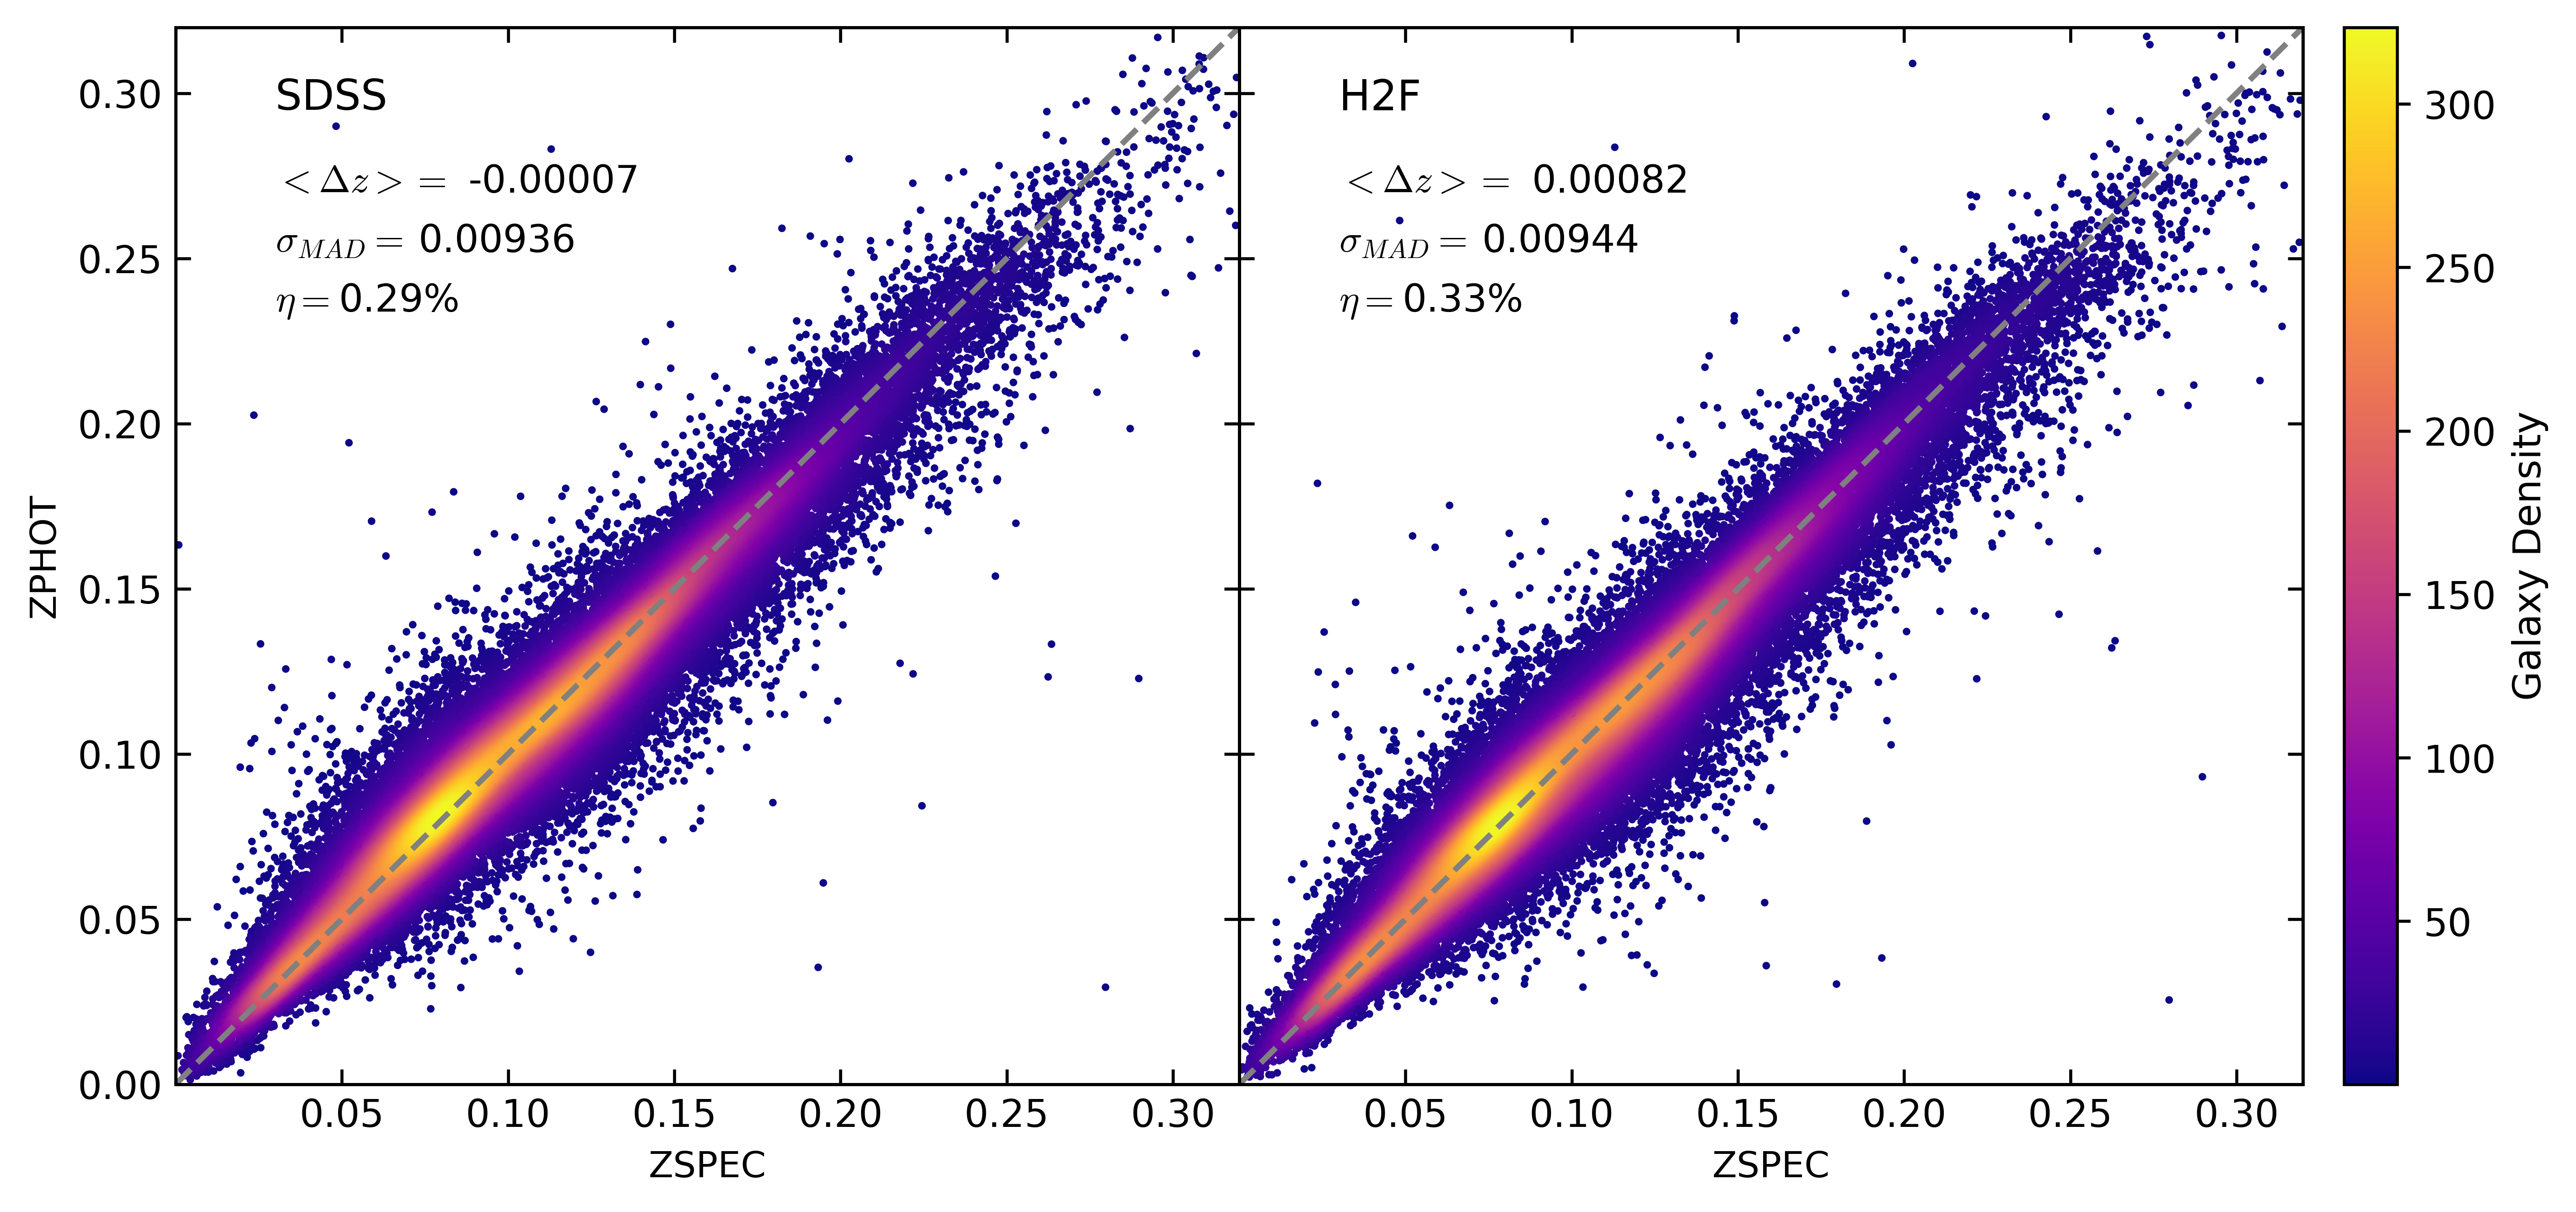

In [181]:
plot_regression(z_test_sdss,
                z_phot_sdss,
                z_phot_h2f,
                dpi=600)